In [1]:
import pandas as pd
import Utils
import Preprocess
import RetrievalMethods

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apostolos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read Data - Preprocessing - Statistics Extraction

In [2]:
passage_collection_file = '../dataset/passage_collection_new.txt'
test_queries_file = '../dataset/test-queries.tsv'
candidate_passages_top1000_file = '../dataset/candidate_passages_top1000.tsv'

In [3]:
passage_collection = Utils.read_collection(passage_collection_file)

In [4]:
### preprocess the passage sentences
preprocessed_passages = Preprocess.process_data(passage_collection)

In [5]:
## find the frquency of each word on th passage collection
ordered_term_frequency_dictionary,total_words = Utils.derive_frequencies_from_collection(preprocessed_passages)

R^2 coefficient is: 0.9805114214304327
Linear Model Weight: -1.7179589215470334
Linear Model Bias: 19.147094057237958


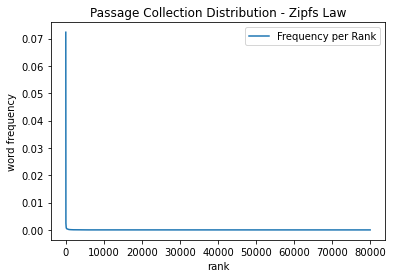

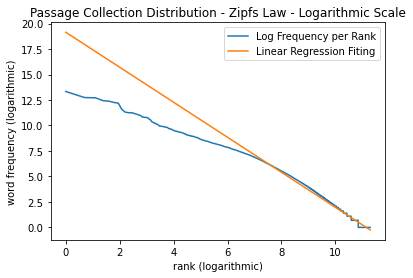

Mean Value: 0.021360837089795512
Std: 0.023424091772214026


In [6]:
Utils.plot_word_frequencies(ordered_term_frequency_dictionary,total_words)

In [7]:
## read the data
test_queries_df = pd.read_csv(test_queries_file, sep='\t', lineterminator='\n')
candidate_passages_top1000_df = pd.read_csv(candidate_passages_top1000_file, sep='\t', lineterminator='\r')

/home/apostolos/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
## set column names
test_queries_df.columns = ['qid','query']
candidate_passages_top1000_df.columns = ['qid','pid','query','passage']

In [9]:
test_queries_df.head()

,qid,query
0,1112389,"what is the county for grand rapids, mn\r"
1,792752,what is ruclip\r
2,1119729,what do you do when you have a nosebleed from ...
3,1105095,where is sugar lake lodge located\r
4,1105103,where is steph currys home in nc\r


In [10]:
candidate_passages_top1000_df.head()

,qid,pid,query,passage
0,1128373,7130104.0,iur definition,This is the definition of RNA along with examp...
1,131843,7130104.0,definition of a sigmet,This is the definition of RNA along with examp...
2,20455,7130335.0,ar glasses definition,Best Answer: The AR designation comes from the...
3,719381,7130335.0,what is ar balance,Best Answer: The AR designation comes from the...
4,20455,7130336.0,ar glasses definition,What does AR really mean? Posted by Quality AR...


In [11]:
## create dictionaries with the data_given
query_dict, test_queries_dict, passages_dict, query_passage_dict = Utils.get_dictionaries(candidate_passages_top1000_df,test_queries_df)

In [12]:
## preprocess the query
preprocessed_queries_dict = Utils.preprocess_queries(test_queries_dict)

In [13]:
RetrievalMethods.Retrieval_Pipeline(preprocessed_queries_dict,passages_dict,query_passage_dict,'BM25')

Processing query 1112389
[(3570708.0, 2.5904490981599455), (3570710.0, 2.576538059116328), (8258542.0, 2.536965373852939), (452838.0, 2.5125160644782887), (452842.0, 2.5125160644782887), (452836.0, 2.5125160644782887), (452837.0, 2.5125160644782887), (640348.0, 2.5037388151295072), (7198431.0, 2.4483361958607155), (1357130.0, 2.3217261653575476), (7558109.0, 2.3217261653575476), (1422900.0, 2.308471543562118), (8501539.0, 2.308471543562118), (7651158.0, 2.2981332443341618), (8501535.0, 2.295371079015635), (2840953.0, 2.2320871480177447), (7296920.0, 2.2009349872515283), (8487543.0, 2.1758609067756582), (7524966.0, 2.1699869241671035), (1449579.0, 2.1677098464487017), (2436039.0, 2.132650980064574), (684766.0, 2.1215919044900566), (1621120.0, 2.103474263263207), (5372950.0, 2.1021233254996416), (7198430.0, 2.101897592092998), (5372946.0, 2.076986689934968), (7784504.0, 2.0650352890746353), (6799747.0, 2.0279759736984135), (902455.0, 2.0020165598549218), (7198424.0, 1.9946426637959287), 

In [14]:
preprocessed_queries_dict.get(1112389)

['county', 'grand']

In [16]:
passages_dict.get(3570710.0)

'Location of Grand Forks County within the state of North Dakota. Grand Forks County is a county equivalent area found in North Dakota, USA. The county government of Grand Forks is found in the county seat of Grand Forks.'